#                                                Data Science Assignment 2

# Task 1

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
from heatmap import heatmap, corrplot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
import statsmodels.api as sm
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Dataset Loaded in

In [2]:
dataset = pd.read_csv('Life Expectancy Data 1.csv')

## Original Dataset

In [3]:
dataset.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.00000,263.00000,62,0.01000,71.27962,65.00000,1154,...,6.00000,8.16000,65.00000,0.10000,584.25921,33736494.00000,17.20000,17.30000,0.47900,10.10000
1,Afghanistan,2014,Developing,59.90000,271.00000,64,0.01000,73.52358,62.00000,492,...,58.00000,8.18000,62.00000,0.10000,612.69651,327582.00000,17.50000,17.50000,0.47600,10.00000
2,Afghanistan,2013,Developing,59.90000,268.00000,66,0.01000,73.21924,64.00000,430,...,62.00000,8.13000,64.00000,0.10000,631.74498,31731688.00000,17.70000,17.70000,0.47000,9.90000
3,Afghanistan,2012,Developing,59.50000,272.00000,69,0.01000,78.18422,67.00000,2787,...,67.00000,8.52000,67.00000,0.10000,669.95900,3696958.00000,17.90000,18.00000,0.46300,9.80000
4,Afghanistan,2011,Developing,59.20000,275.00000,71,0.01000,7.09711,68.00000,3013,...,68.00000,7.87000,68.00000,0.10000,63.53723,2978599.00000,18.20000,18.20000,0.45400,9.50000


## a) Preprocess the dataset to impute missing values.

## Checking which columns have missing Data
By running the below code, we can see the number of missing data we have.

In [4]:
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life Expectancy                     10
Adult Mortality                     10
Infant Deaths                        0
Alcohol                            194
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-Five Deaths                    0
Polio                               19
Total Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 Years                 34
Thinness 5-9 Years                  34
Income Composition of Resources    167
Schooling                          163
dtype: int64

## Seperating Columns to be filled by Most Frequent and Mean
I have used Most Frequent method to fill the missing INTEGER data, to avoid stuff like "20.5 Deaths".
I have used Mean method to fill the rest of the missing data, with decimal points.

In [5]:
mean_columns = dataset[['Life Expectancy','Alcohol','BMI','Total Expenditure','GDP','Thinness 1-19 Years','Thinness 5-9 Years','Income Composition of Resources','Schooling']]
mfrequent_columns = dataset[['Adult Mortality','Hepatitis B','Polio','Diphtheria','Population']]

for column in mean_columns:
    dataset[column].fillna(dataset[column].mean(), inplace=True)
    
for column in mfrequent_columns:
    dataset[column].fillna(dataset[column].value_counts().index[0], inplace=True)

### By running this code, we can verify that we filled in the missing data successfully.

In [6]:
dataset.isnull().sum()

Country                            0
Year                               0
Status                             0
Life Expectancy                    0
Adult Mortality                    0
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-Five Deaths                  0
Polio                              0
Total Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 Years                0
Thinness 5-9 Years                 0
Income Composition of Resources    0
Schooling                          0
dtype: int64

## b) Use boxplots to check for outliers.

Using the boxplot function of the seaborn library, I was able to show the box plot and outliers of each column.

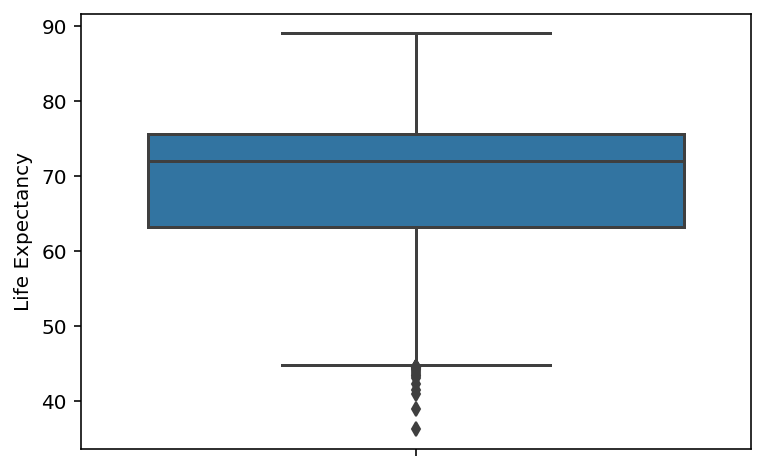

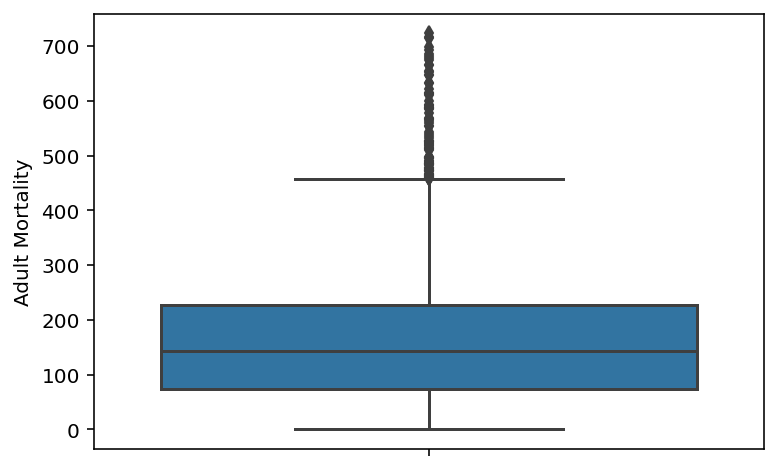

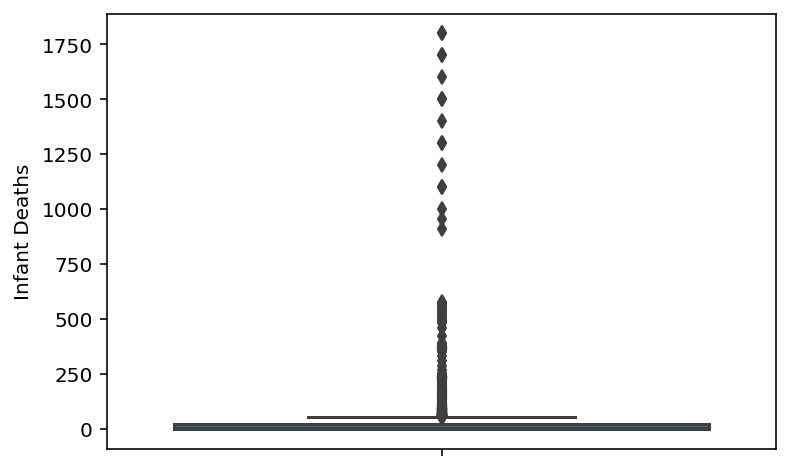

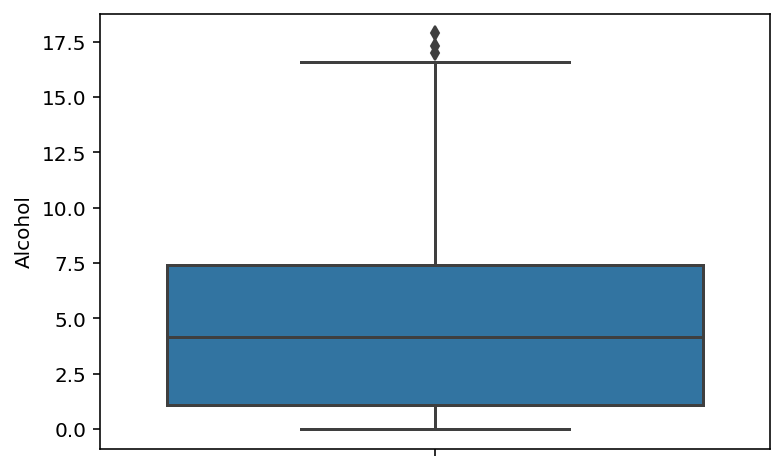

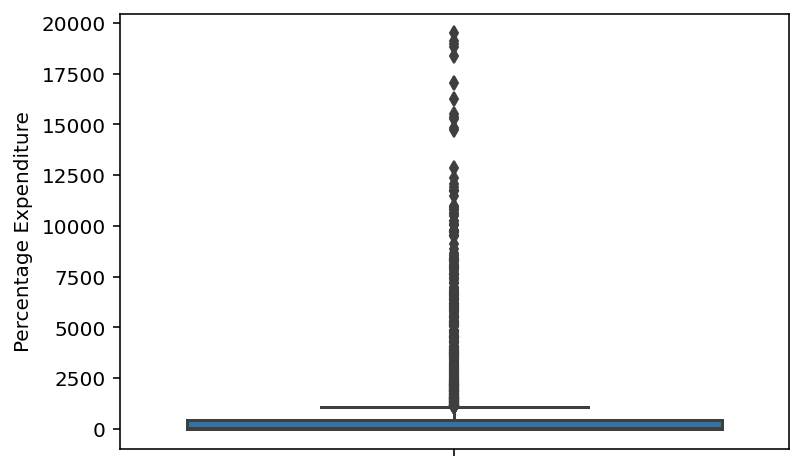

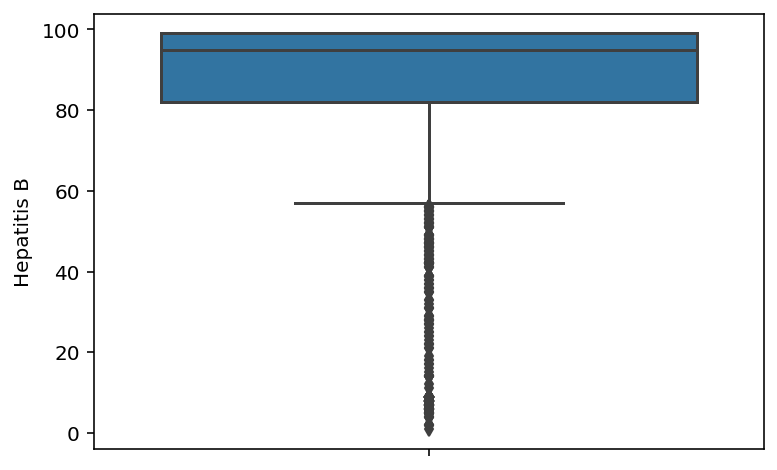

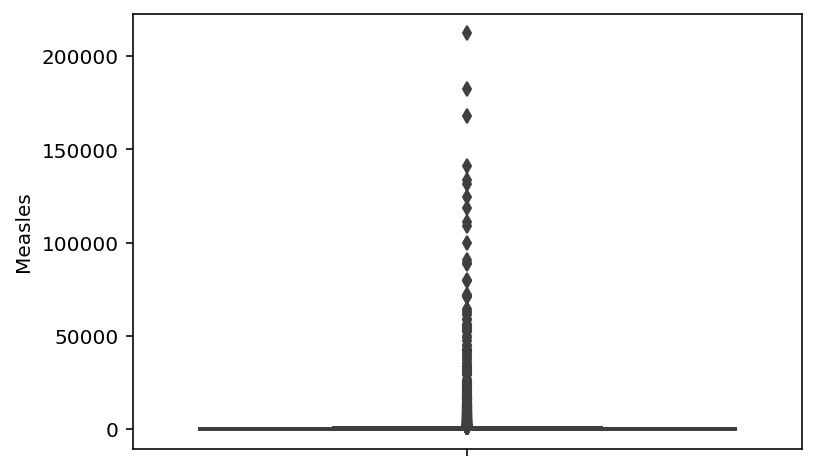

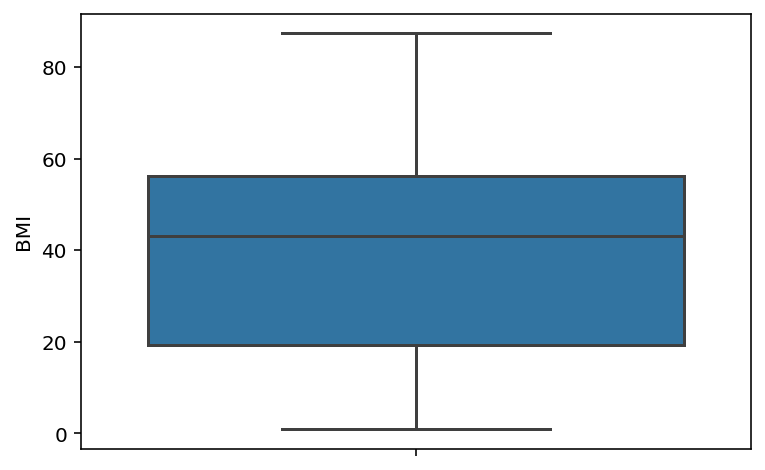

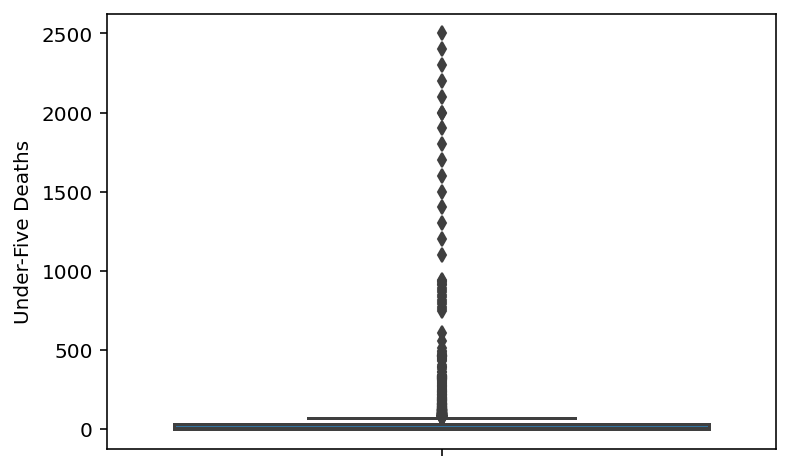

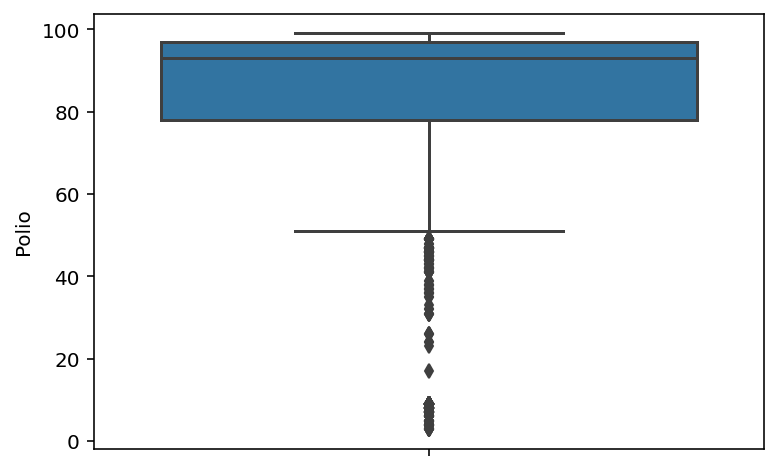

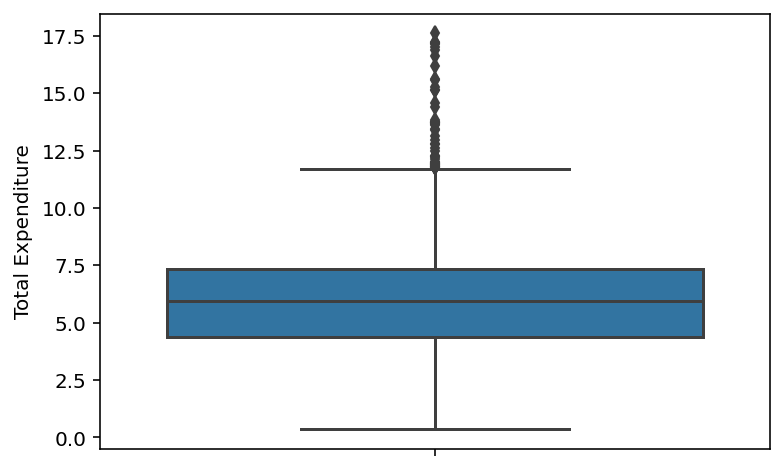

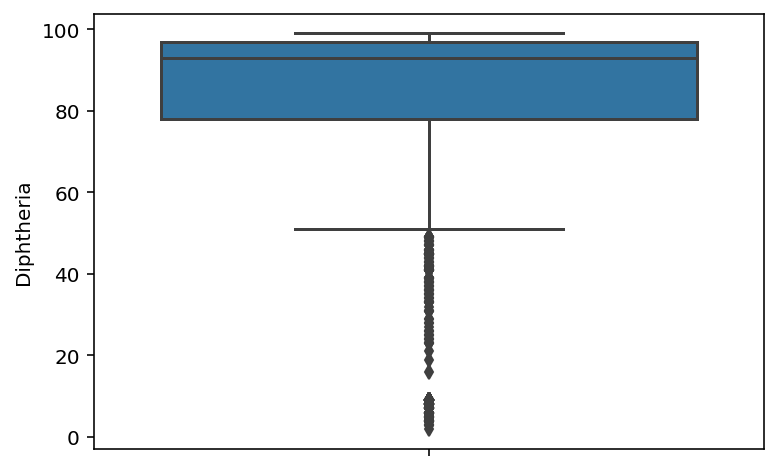

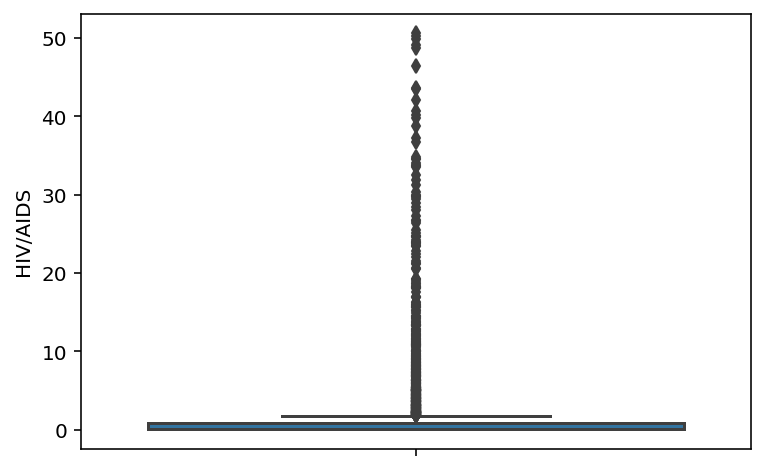

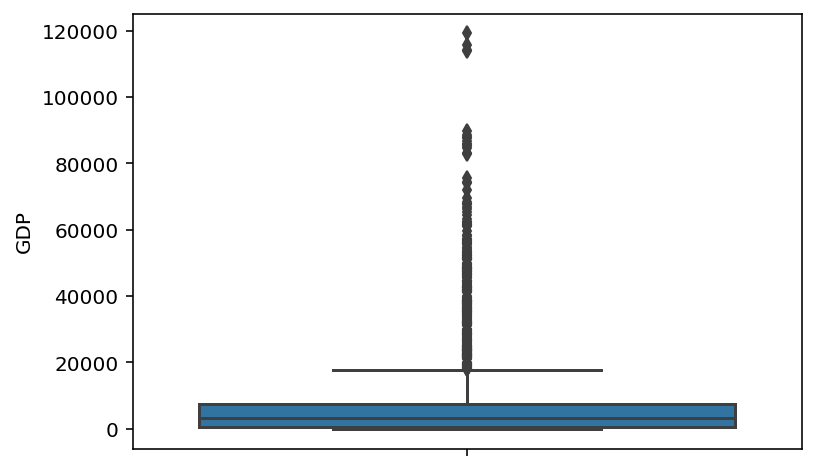

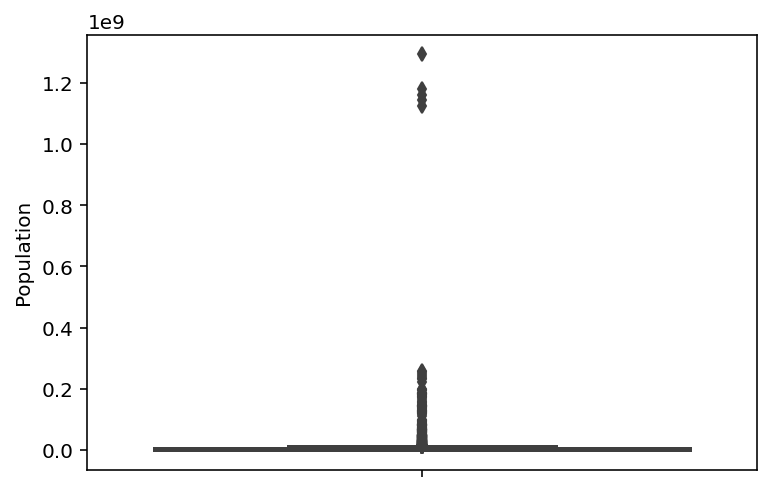

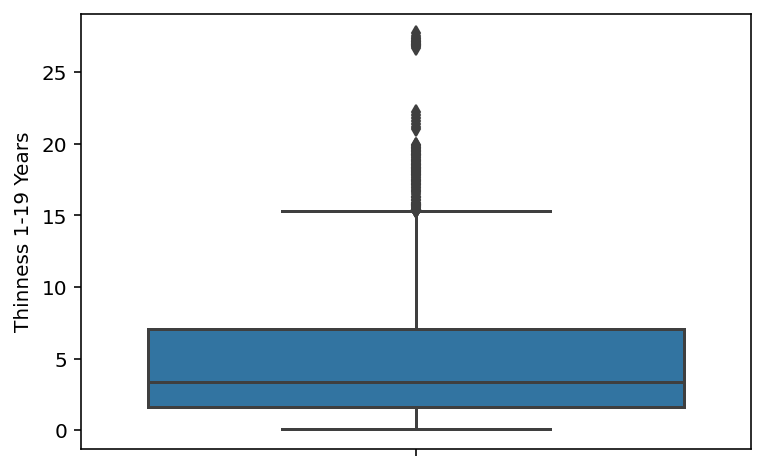

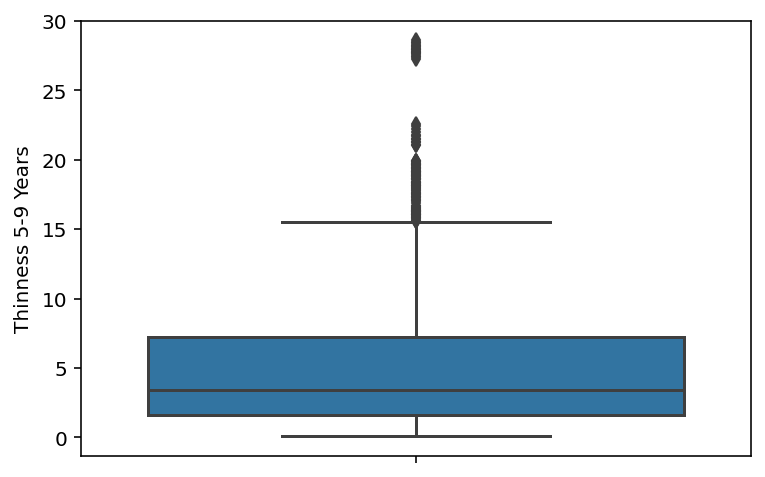

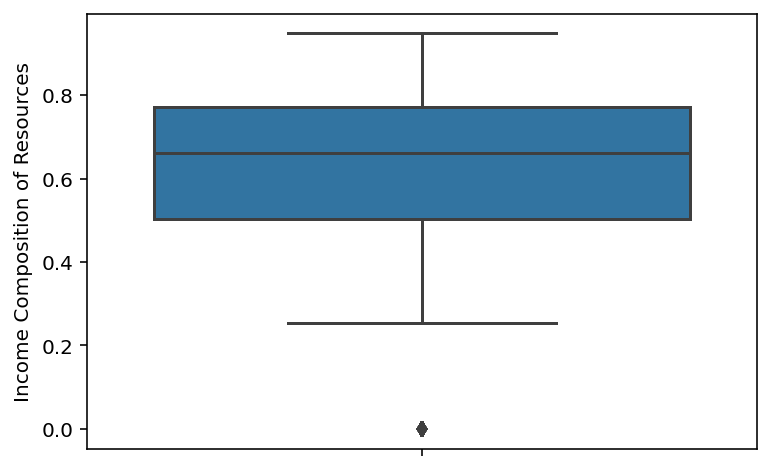

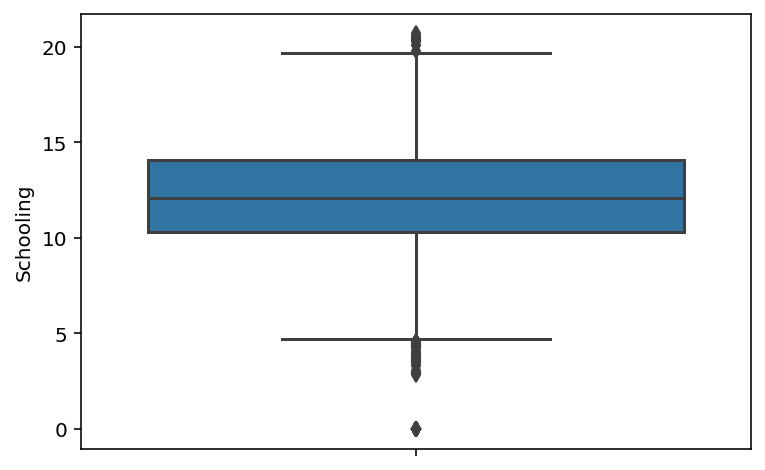

In [7]:
columns = ['Life Expectancy','Adult Mortality','Infant Deaths','Alcohol', 'Percentage Expenditure','Hepatitis B','Measles','BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP','Population','Thinness 1-19 Years', 'Thinness 5-9 Years', 'Income Composition of Resources', 'Schooling']
for column in columns:
    sns.boxplot(data=dataset, y=column)
    plt.show()

# c) Provide a correlation plot for the variables in the dataset, including the dependent variable. Exclude the columns A, B and C. Comment on the strengths on the predictors. Comment on the correlations between predictors.

Checking the correlations between the predictors, of course they correlate best with themselves. The more blue and bigger the squares are, the better they correlate which each other. 

For example if we look at Under-Five Deaths and Infant deaths, they have high positive correlation with each other.
Schooling and Income Composition of Resources have high positive correlation with each other.
Thinness 5-9 Years and Thinness 1-19 Years have high positive correlation with each other. 

For example if we look at BMI and Thinness 5-9 Years and Thinness 1-19 Years, they have high negative correlation with each other.
Life expectancy and Adult Mortality have high negative correlation with each other.

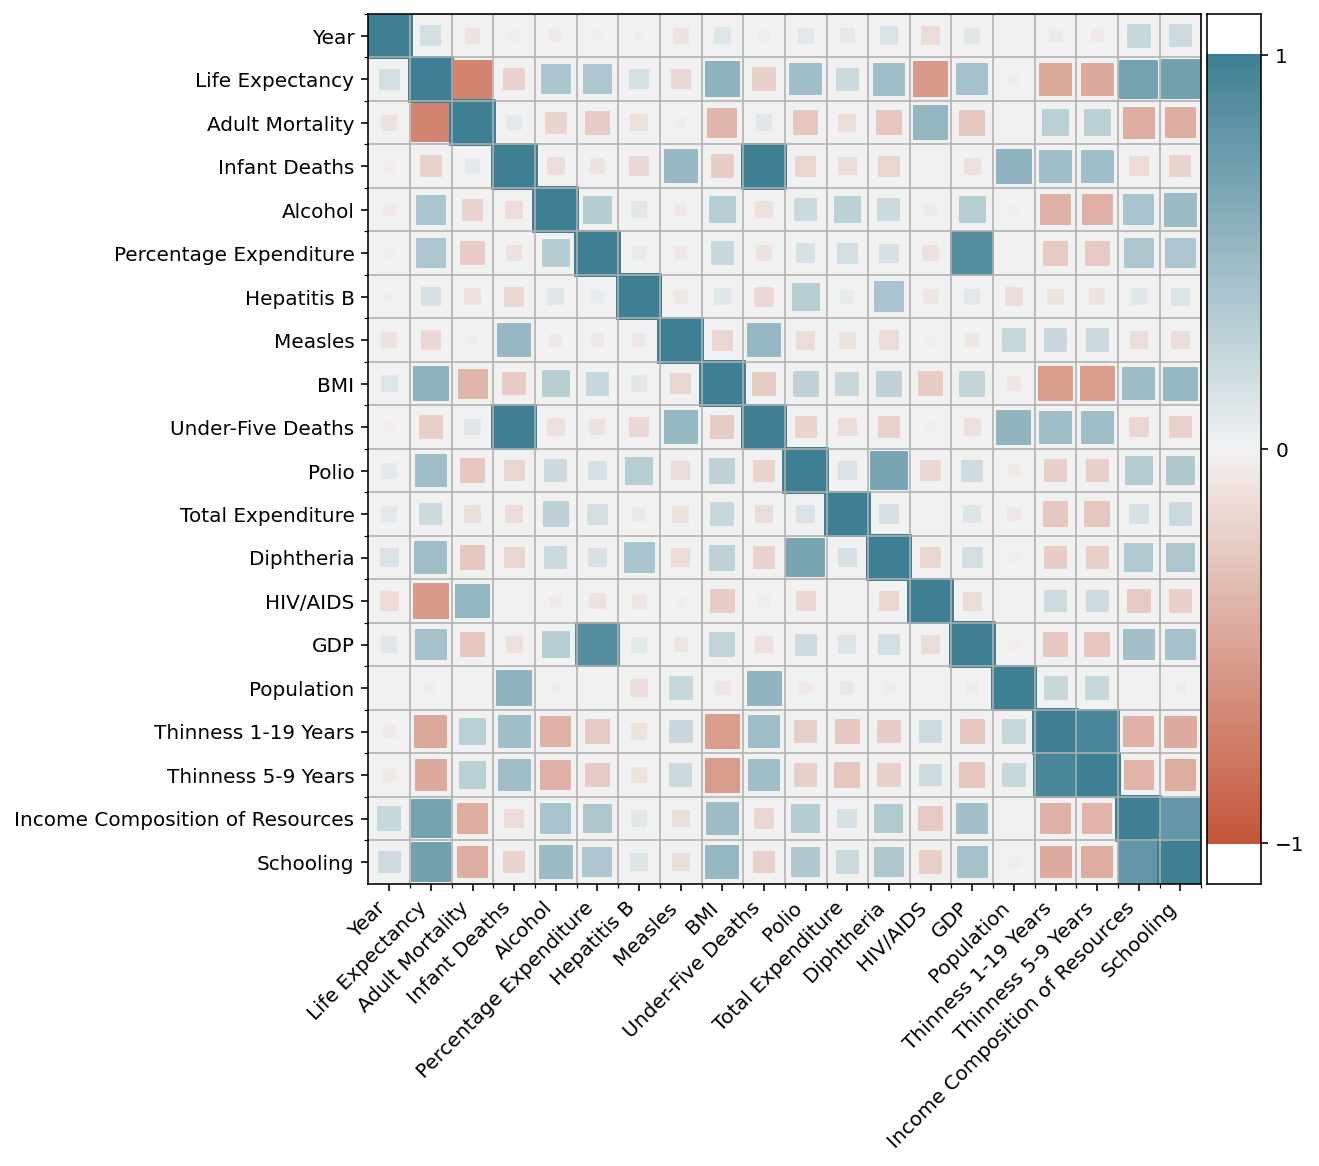

In [8]:
plt.figure(figsize=(8, 8))
corrplot(dataset.corr());

# Task 2

## a) Determine which independent variable is the most related with the dependent variable by developing a linear regression model between the dependent variable and each independent variable.

To determine which independent variable is the most related, we first have to create the models and then calculated squared_adj for each of them.

Declared the variables and seperated the predictors.

In [9]:
model_scores = {}
predictors = ['Adult Mortality','Infant Deaths','Alcohol', 'Percentage Expenditure','Hepatitis B','Measles','BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP','Population','Thinness 1-19 Years', 'Thinness 5-9 Years', 'Income Composition of Resources', 'Schooling']

In this loop, each predictor in the predictors list gets into Linear Regression and then statsmodels module helps us calculate adjusted rsquared and then we add the scores into the model_scores dictionary to later be shown as a table.

In [10]:
for predictor in predictors:
    x=dataset[[predictor]]
    y=dataset[['Life Expectancy']]
    
    X = sm.add_constant(x)
    reg = sm.OLS(y, X).fit()

    model_scores[x.columns[0]] = reg.rsquared_adj

## b) Rank the predictors according to the Adjusted R2 values of the linear models obtained.

Now we put the scores into the DataFrame to display. Higher Adjusted R2 Score means better. Also to answer the previous question, higher the value is on the list, the better related it is.

In [11]:
r2_scores_df = pd.DataFrame.from_dict(model_scores, orient='index', columns=['Adjusted R2 Scores'])
r2_scores_df.sort_values(by='Adjusted R2 Scores',ascending=False)

,Adjusted R2 Scores
Schooling,0.51115
Adult Mortality,0.48226
Income Composition of Resources,0.47936
BMI,0.31253
HIV/AIDS,0.30941
Thinness 1-19 Years,0.22267
Diphtheria,0.22083
Thinness 5-9 Years,0.21748
Polio,0.20802
GDP,0.18505


# Task 3

## a) Compute a linear regression model using all dependent variables and report the Adjusted R2 value. 

Here we have to use Multiple Linear Regression technique, luckily statsmodels support multiple linear regression. From there we can calculate the rsquared_adj as shown at the output.

In [12]:
x=dataset[predictors]
y=dataset[['Life Expectancy']]

X = sm.add_constant(x)
all_reg = sm.OLS(y, X).fit()

all_reg.rsquared_adj

0.8165300412769076

## b) Display the model (i.e. coefficients) and comment about the relative importance of the predictors by considering the p-values of the predictors

By using the summary() function of statsmodels, we can check the stats of the linear regression. If we take a look at "P>|t|" column of the output,  we can see the p-values of the predictors. 

In [13]:
all_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     727.2
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:07:08   Log-Likelihood:                -8285.0
No. Observations:                2938   AIC:                         1.661e+04
Df Residuals:                    2919   BIC:                         1.672e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              54.5184      0.583     93.571      0.000      53.376      55.661
Adult Mortality                    -0.0202      0.001    -25.477      0.000      -0.022      -0.019
Infant Deaths                       0.0988      0.008     11.650      0.000       0.082       0.115
Alcohol                             0.1268      0.024      5.263      0.000       0.080       0.174
Percentage Expenditure              0.0001   8.43e-05      1.769      0.077   -1.62e-05       0.000
Hepatitis B                        -0.0143      0.004     -4.019      0.000      -0.021      -0.007
Measles                         -1.987e-05   7.69e-06     -2.583      0.010    -3.5e-05   -4.79e-06
BMI                                 0.0418      0.005      8.433      0.000       0.032       0.052
Under-Five Deaths                  -0.0738      0.006    -11.876      0.000      -0.086      -0.062
Polio                               0.0287      0.004      6.426      0.000       0.020       0.037
Total Expenditure                   0.0845      0.034      2.490      0.013       0.018       0.151
Diphtheria                          0.0394      0.005      8.514      0.000       0.030       0.048
HIV/AIDS                           -0.4723      0.018    -26.792      0.000      -0.507      -0.438
GDP                              3.573e-05    1.3e-05      2.744      0.006    1.02e-05    6.13e-05
Population                      -1.422e-10    1.7e-09     -0.084      0.933   -3.47e-09    3.19e-09
Thinness 1-19 Years                -0.0807      0.051     -1.595      0.111      -0.180       0.019
Thinness 5-9 Years                  0.0003      0.050      0.006      0.995      -0.098       0.098
Income Composition of Resources     5.9024      0.638      9.256      0.000       4.652       7.153
Schooling                           0.6843      0.042     16.373      0.000       0.602       0.766
==============================================================================
Omnibus:                      131.523   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.435
Skew:                          -0.171   Prob(JB):                     1.10e-82
Kurtosis:                       4.722   Cond. No.                     4.84e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## c) Using either AIC or p-values, discard the weakly related variables using either forward or backward selection

By using this script I have found online, I could implement forward and backward selection into Python.

In [14]:
#Copyright 2019 Sinan Talha Hascelik
#
#Licensed under the Apache License, Version 2.0 (the "License");
#you may not use this file except in compliance with the License.
#You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
#Unless required by applicable law or agreed to in writing, software
#distributed under the License is distributed on an "AS IS" BASIS,
#WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#See the License for the specific language governing permissions and
#limitations under the License.

import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import statsmodels.api as sm

def forwardSelection(X, y, model_type ="linear",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
    """
    Forward Selection is a function, based on regression models, that returns significant features and selection iterations.\n
    Required Libraries: pandas, numpy, statmodels
    
    Parameters
    ----------
    X : Independent variables (Pandas Dataframe)\n
    y : Dependent variable (Pandas Series, Pandas Dataframe)\n
    model_type : 'linear' or 'logistic'\n
    elimination_criteria : 'aic', 'bic', 'r2', 'adjr2' or None\n
        'aic' refers Akaike information criterion\n
        'bic' refers Bayesian information criterion\n
        'r2' refers R-squared (Only works on linear model type)\n
        'r2' refers Adjusted R-squared (Only works on linear model type)\n
    varchar_process : 'drop', 'dummy' or 'dummy_dropfirst'\n
        'drop' drops varchar features\n
        'dummy' creates dummies for all levels of all varchars\n
        'dummy_dropfirst' creates dummies for all levels of all varchars, and drops first levels\n
    sl : Significance Level (default: 0.05)\n
    

    Returns
    -------
    columns(list), iteration_logs(str)\n\n
    Not Returns a Model
    

    Tested On
    ---------
    Python v3.6.7, Pandas v0.23.4, Numpy v1.15.04, StatModels v0.9.0
    

    See Also
    --------
    https://en.wikipedia.org/wiki/Stepwise_regression
    """
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __forwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)
    
def backwardSelection(X, y, model_type ="linear",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
    """
    Backward Selection is a function, based on regression models, that returns significant features and selection iterations.\n
    Required Libraries: pandas, numpy, statmodels
    
    Parameters
    ----------
    X : Independent variables (Pandas Dataframe)\n
    y : Dependent variable (Pandas Series, Pandas Dataframe)\n
    model_type : 'linear' or 'logistic'\n
    elimination_criteria : 'aic', 'bic', 'r2', 'adjr2' or None\n
        'aic' refers Akaike information criterion\n
        'bic' refers Bayesian information criterion\n
        'r2' refers R-squared (Only works on linear model type)\n
        'r2' refers Adjusted R-squared (Only works on linear model type)\n
    varchar_process : 'drop', 'dummy' or 'dummy_dropfirst'\n
        'drop' drops varchar features\n
        'dummy' creates dummies for all levels of all varchars\n
        'dummy_dropfirst' creates dummies for all levels of all varchars, and drops first levels\n
    sl : Significance Level (default: 0.05)\n
    

    Returns
    -------
    columns(list), iteration_logs(str)\n\n
    Not Returns a Model
    

    Tested On
    ---------
    Python v3.6.7, Pandas v0.23.4, Numpy v1.15.04, StatModels v0.9.0
    

    See Also
    --------
    https://en.wikipedia.org/wiki/Stepwise_regression    
    """
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __backwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)

def __varcharProcessing__(X, varchar_process = "dummy_dropfirst"):
    
    dtypes = X.dtypes
    if varchar_process == "drop":   
        X = X.drop(columns = dtypes[dtypes == np.object].index.tolist())
        print("Character Variables (Dropped):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy":
        X = pd.get_dummies(X,drop_first=False)
        print("Character Variables (Dummies Generated):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy_dropfirst":
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    else: 
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    
    X["intercept"] = 1
    cols = X.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    X = X[cols]
    
    return X

def __forwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):

    iterations_log = ""
    cols = X.columns.tolist()
    
    def regressor(y,X, model_type=model_type):
        if model_type == "linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    
    selected_cols = ["intercept"]
    other_cols = cols.copy()
    other_cols.remove("intercept")
    
    model = regressor(y, X[selected_cols])
    
    if elimination_criteria == "aic":
        criteria = model.aic
    elif elimination_criteria == "bic":
        criteria = model.bic
    elif elimination_criteria == "r2" and model_type =="linear":
        criteria = model.rsquared
    elif elimination_criteria == "adjr2" and model_type =="linear":
        criteria = model.rsquared_adj
    
    
    for i in range(X.shape[1]):
        pvals = pd.DataFrame(columns = ["Cols","Pval"])
        for j in other_cols:
            model = regressor(y, X[selected_cols+[j]])
            pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
        pvals = pvals.sort_values(by = ["Pval"]).reset_index(drop=True)
        pvals = pvals[pvals.Pval<=sl]
        if pvals.shape[0] > 0:
            
            model = regressor(y, X[selected_cols+[pvals["Cols"][0]]])
            iterations_log += str("\nEntered : "+pvals["Cols"][0] + "\n")    
            iterations_log += "\n\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n\n"
                    
        
            if  elimination_criteria == "aic":
                new_criteria = model.aic
                if new_criteria < criteria:
                    print("Entered :", pvals["Cols"][0], "\tAIC :", model.aic)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break
            elif  elimination_criteria == "bic":
                new_criteria = model.bic
                if new_criteria < criteria:
                    print("Entered :", pvals["Cols"][0], "\tBIC :", model.bic)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break        
            elif  elimination_criteria == "r2" and model_type =="linear":
                new_criteria = model.rsquared
                if new_criteria > criteria:
                    print("Entered :", pvals["Cols"][0], "\tR2 :", model.rsquared)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break           
            elif  elimination_criteria == "adjr2" and model_type =="linear":
                new_criteria = model.rsquared_adj
                if new_criteria > criteria:
                    print("Entered :", pvals["Cols"][0], "\tAdjR2 :", model.rsquared_adj)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("Break : Criteria")
                    break
            else:
                print("Entered :", pvals["Cols"][0])
                selected_cols.append(pvals["Cols"][0])
                other_cols.remove(pvals["Cols"][0])            
                
        else:
            print("Break : Significance Level")
            break
        
    model = regressor(y, X[selected_cols])
    if elimination_criteria == "aic":
        criteria = model.aic
    elif elimination_criteria == "bic":
        criteria = model.bic
    elif elimination_criteria == "r2" and model_type =="linear":
        criteria = model.rsquared
    elif elimination_criteria == "adjr2" and model_type =="linear":
        criteria = model.rsquared_adj
    
    print(model.summary())
    print("AIC: "+str(model.aic))
    print("BIC: "+str(model.bic))
    print("Final Variables:", selected_cols)

    return selected_cols, iterations_log

def __backwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):
    
    iterations_log = ""
    last_eleminated = ""    
    cols = X.columns.tolist()

    def regressor(y,X, model_type=model_type):
        if model_type =="linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    for i in range(X.shape[1]):
        if i != 0 :          
            if elimination_criteria == "aic":
                criteria = model.aic
                new_model = regressor(y,X)
                new_criteria = new_model.aic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "bic":
                criteria = model.bic
                new_model = regressor(y,X)
                new_criteria = new_model.bic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "adjr2" and model_type =="linear":
                criteria = model.rsquared_adj
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared_adj
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "r2" and model_type =="linear":
                criteria = model.rsquared
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break   
            else: 
                new_model = regressor(y,X)
            model = new_model
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        else:
            model = regressor(y,X)
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        maxPval = max(model.pvalues)
        cols = X.columns.tolist()
        if maxPval > sl:
            for j in cols:
                if (model.pvalues[j] == maxPval):
                    print("Eliminated :" ,j)
                    iterations_log += str("\n\nEliminated : "+j+ "\n\n")
                    
                    del X[j]
                    last_eleminated = j
        else:
            break
    print(str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic))
    print("Final Variables:", cols)
    iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
    return cols, iterations_log

Here we prepare the x and y datas to be inserted into the forwardSelection of the script above. This script outputs a bunch of stuff, but what we are looking for is the Final variables list. By taking the variables in that list, we eliminate the weak variables.

In [15]:
x=dataset[predictors]
y=dataset[['Life Expectancy']]

forwardSelection(x, y)

Character Variables (Dummies Generated, First Dummies Dropped): []
Entered : Adult Mortality 	AIC : 19638.97726850929
Entered : Schooling 	AIC : 18093.10638995967
Entered : HIV/AIDS 	AIC : 17533.284889162875
Entered : Diphtheria 	AIC : 17232.266626851648
Entered : BMI 	AIC : 17068.7759565733
Entered : Income Composition of Resources 	AIC : 16942.31497374198
Entered : Percentage Expenditure 	AIC : 16868.959510401688
Entered : Polio 	AIC : 16823.779214008362
Entered : Thinness 1-19 Years 	AIC : 16795.972781929326
Entered : Hepatitis B 	AIC : 16777.68863832849
Entered : Measles 	AIC : 16761.273671339568
Entered : Alcohol 	AIC : 16748.116983790605
Entered : Total Expenditure 	AIC : 16744.7622682427
Entered : GDP 	AIC : 16741.27193367825
Break : Significance Level
                            OLS Regression Results                            
Dep. Variable:        Life Expectancy   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                 

(['intercept',
  'Adult Mortality',
  'Schooling',
  'HIV/AIDS',
  'Diphtheria',
  'BMI',
  'Income Composition of Resources',
  'Percentage Expenditure',
  'Polio',
  'Thinness 1-19 Years',
  'Hepatitis B',
  'Measles',
  'Alcohol',
  'Total Expenditure',
  'GDP'],
 '\nEntered : Adult Mortality\n\n\n                            OLS Regression Results                            \n==============================================================================\nDep. Variable:        Life Expectancy   R-squared:                       0.482\nModel:                            OLS   Adj. R-squared:                  0.482\nMethod:                 Least Squares   F-statistic:                     2737.\nDate:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00\nTime:                        23:07:09   Log-Likelihood:                -9817.5\nNo. Observations:                2938   AIC:                         1.964e+04\nDf Residuals:                    2936   BIC:              

In here, we run the Multiple Linear Regression with the deleted weak variables and get the new adjusted rsquared. 

In [16]:
x = dataset[['Adult Mortality', 'Schooling', 'HIV/AIDS', 'Diphtheria', 'BMI', 'Income Composition of Resources', 'Percentage Expenditure', 'Polio', 'Thinness 1-19 Years', 'Hepatitis B', 'Measles', 'Alcohol', 'Total Expenditure', 'GDP']]
y = dataset[['Life Expectancy']]

X = sm.add_constant(x)
optimized_reg = sm.OLS(y, X).fit()

optimized_reg.rsquared_adj

0.8077530219116467